In [28]:
import pickle
import datetime

import THESIS2019.utils.to_lexicon as lex
from THESIS2019.utils.base_words import *
import THESIS2019.utils.get_articles as get

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload

import dit
from dit.divergences import jensen_shannon_divergence

In [29]:
# notebook to find consistency over time of topic models using LDA
reload(get)

datapath = "/Users/ninawang/Thesis/remote/THESIS2019/example_data_1000/"
outlets = ['BREITBART','NATIONALREVIEW','FOX',
             'WASHINGTONEXAMINER','REUTERS','NPR',
             'NYT', 'MSN','CNN','SLATE']
articles = get.get_articles_outlets(datapath,outlets,2012,filter_date=False)

for outlet, article in articles.items():
    print("%s has %d articles" %(outlet, len(article)))


BREITBART2012-2013 has 960 articles
NATIONALREVIEW2012-2013 has 986 articles
FOX2012-2013 has 991 articles
WASHINGTONEXAMINER2012-2013 has 949 articles
REUTERS2012-2013 has 999 articles
NPR2012-2013 has 920 articles
NYT2012-2013 has 1000 articles
MSN2012-2013 has 992 articles
CNN2012-2013 has 825 articles
SLATE2012-2013 has 668 articles


In [35]:
# LOAD
path="/Users/ninawang/Thesis/remote/THESIS2019/PART1/TopicModel/LDA/"
with open(path+"all_model2012.pkl","rb") as f:
    model = pickle.load(f)
with open(path+"all_dictionary2012.pkl","rb") as f:
    dictionary = pickle.load(f)
with open(path+"all_articles2012.pkl","rb") as f:
    articles_list = pickle.load(f)
with open(path+"all_corpus2012.pkl","rb") as f:
    corpus = pickle.load(f)

In [74]:
topics = model.show_topics(num_topics=-1, num_words=5, log=False, formatted=False)
for idx, topic in topics:
    print ("topic " + str(idx) + ": " + (",  ").join([str(t[0]) for t in topic]))

topic 0: attack,  benghazi,  china,  secur,  report
topic 1: israel,  egypt,  palestinian,  american,  isra
topic 2: polic,  bomb,  peopl,  north_korea,  day
topic 3: white_hous,  lew,  former,  nomin,  bank
topic 4: sanford,  south_carolina,  chavez,  demint,  colbert_busch
topic 5: group,  ir,  polit,  report,  offici
topic 6: administr,  offici,  report,  inform,  investig
topic 7: campaign,  vote,  state,  voter,  elect
topic 8: menendez,  melgen,  tell,  offic,  fire
topic 9: percent,  tax,  year,  govern,  pay
topic 10: hagel,  vote,  nomin,  confirm,  support
topic 11: govern,  polit,  parti,  storm,  new_jersey
topic 12: state,  bill,  program,  texa,  illinoi
topic 13: bill,  hous,  congress,  immigr,  cut
topic 14: know,  think,  peopl,  go,  get
topic 15: deal,  fiscal_cliff,  spend,  spend_cut,  cut
topic 16: women,  white_hous,  make,  former,  get
topic 17: day,  white_hous,  first,  nation,  american
topic 18: energi,  compani,  oil,  industri,  project
topic 19: mexico,

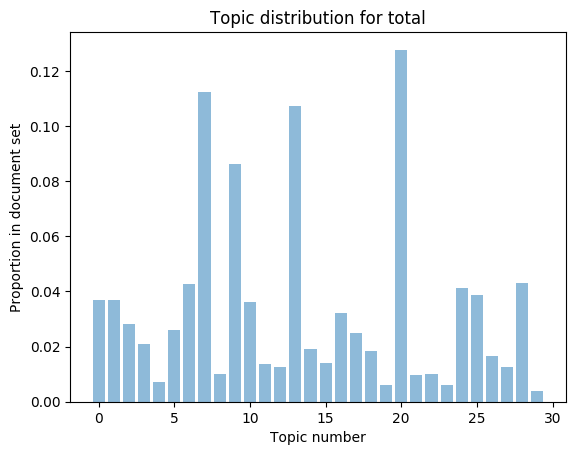

In [41]:
# aggregate topic distribution for a document set
from collections import defaultdict

def total_topic_distribution(model, corpus):
    dist = defaultdict(lambda:0)
    count = defaultdict(lambda:0)
    for doc in corpus:
        topics = model[doc]
#         print(topics)
        for topic,prob in topics:
            dist[topic] += prob 
            count[topic] += 1
    # normalize
    s = sum(dist.values())
    for d in dist:
        dist[d] /= s
    return dist

def graph_distribution(dist, title):
    x, y = dist.keys(), dist.values()
    plt.bar(x, y, alpha=0.5)
    plt.xlabel('Topic number')
    plt.ylabel('Proportion in document set')
    plt.title('Topic distribution for %s' %(title))

    plt.show()


dist = total_topic_distribution(model, corpus)
graph_distribution(dist, "total")

In [37]:
print(articles_list.keys())
print(articles_list['BREITBART2012-2013'][0])

dict_keys(['BREITBART2012-2013', 'NATIONALREVIEW2012-2013', 'FOX2012-2013', 'WASHINGTONEXAMINER2012-2013', 'REUTERS2012-2013', 'NPR2012-2013', 'NYT2012-2013', 'MSN2012-2013', 'CNN2012-2013', 'SLATE2012-2013'])
['william_bigelow', 'jan', 'chuck_schumer', 'endors', 'chuck_hagel', 'nomin_secretari', 'defens', 'answer', 'hagel', 'close', 'associ', 'venom', 'colleagu', 'arnaud', 'borchgrav', 'cha', 'freeman', 'work', 'hagel', 'atlant_council', 'head', 'borchgrav', 'call', 'israel', 'apartheid', 'state', 'charg', 'long', 'ago', 'debunk', 'major', 'isra', 'recoil', 'horror', 'think', 'emul', 'regim', 'apartheid', 'system', 'institution', 'racial', 'segreg', 'practic', 'south_africa', 'west_bank', 'yet', 'isra_prime', 'minist', 'benyamin', 'netanyahu', 'consid', 'less', 'threaten', 'palestinian', 'independ', 'apartheid', 'gradual', 'emerg', 'west_bank', 'isra', 'occup', 'israel', 'victori', 'six', 'day', 'war', 'almost', 'half', 'centuri', 'ago', 'south_africa', 'cold_war', 'apartheid', 'see',

BREITBART2012-2013 494


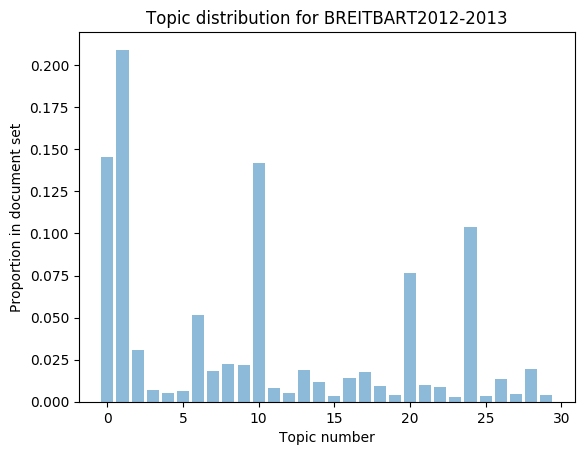

NATIONALREVIEW2012-2013 777


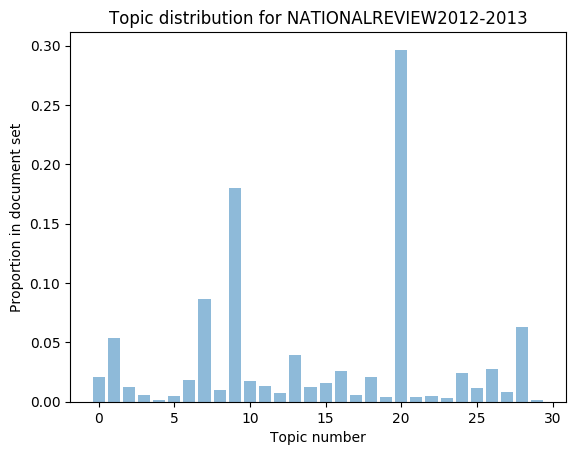

FOX2012-2013 256


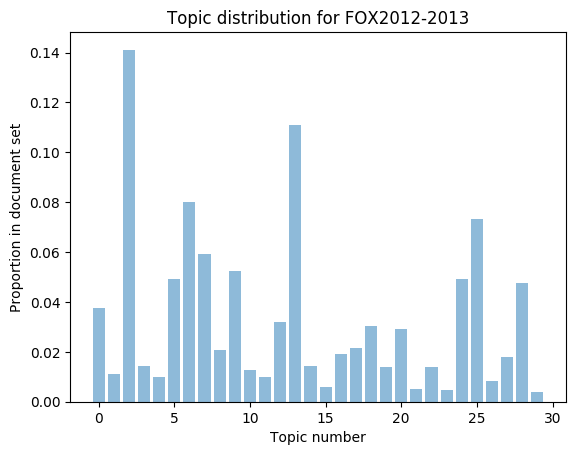

WASHINGTONEXAMINER2012-2013 574


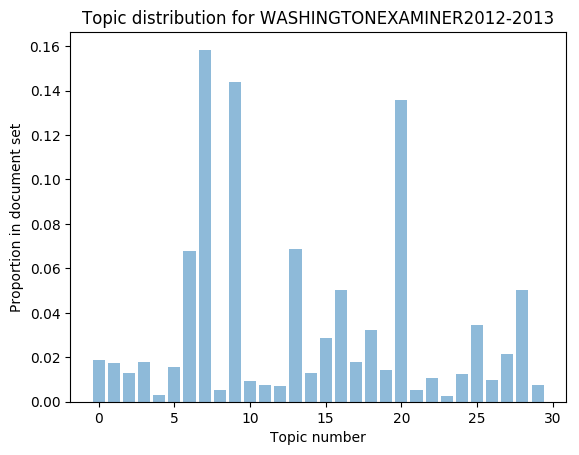

REUTERS2012-2013 934


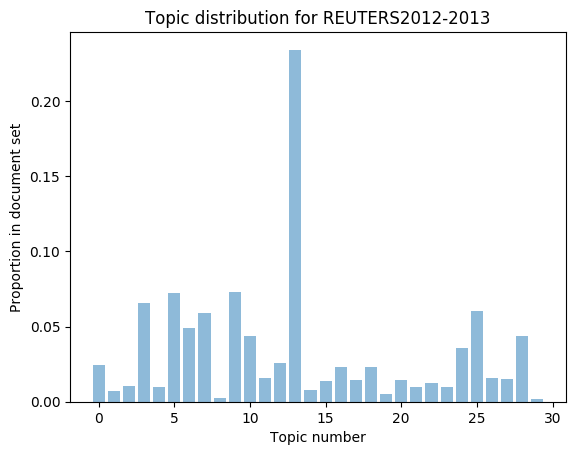

NPR2012-2013 155


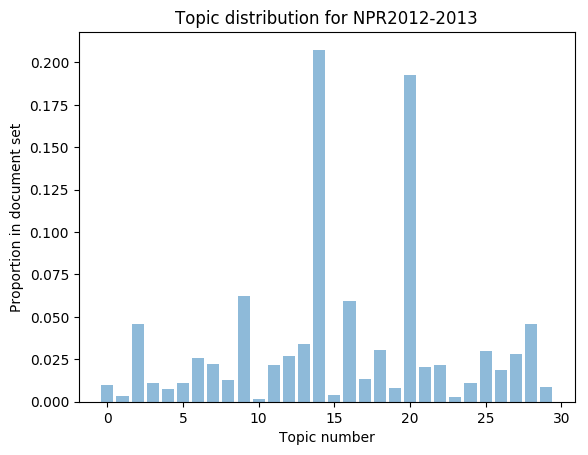

NYT2012-2013 523


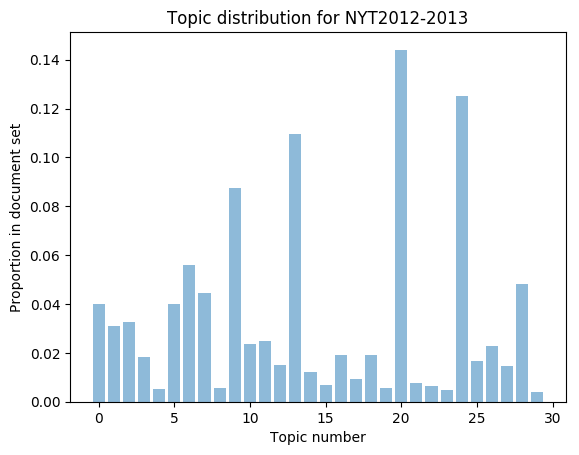

MSN2012-2013 233


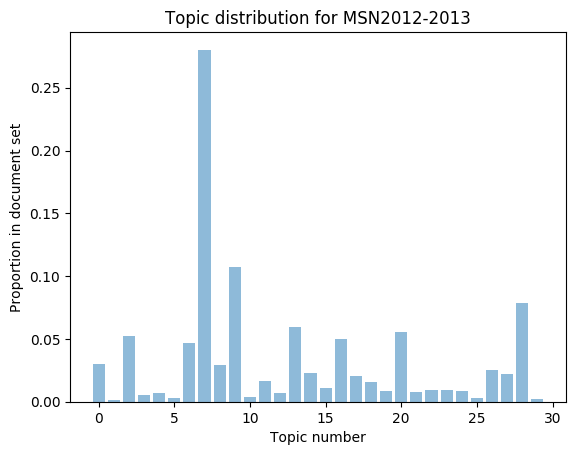

CNN2012-2013 784


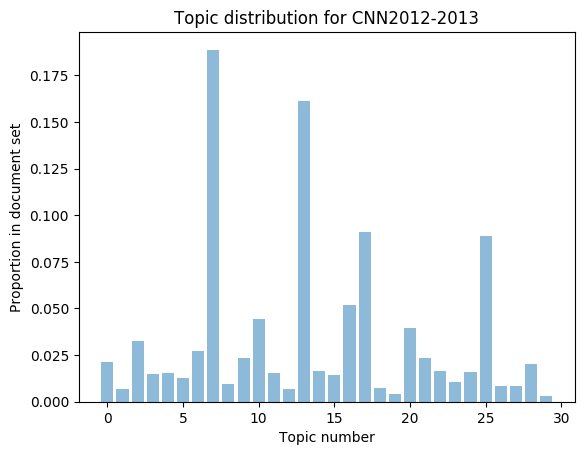

SLATE2012-2013 489


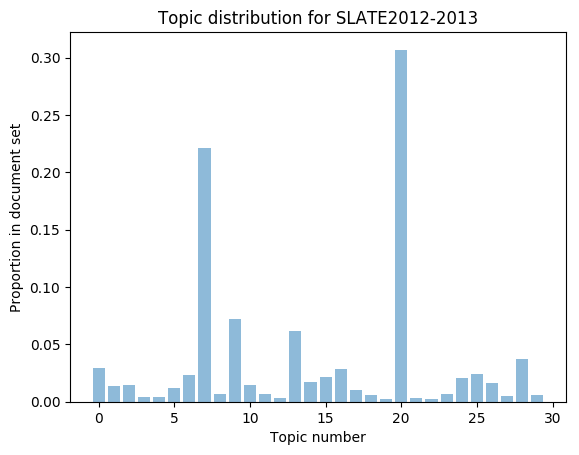

JS Divergence of topic: 0.426868


In [43]:
from THESIS2019.PART1.TopicModel.LDA import lda_consistency as ldac
reload(ldac)

# transform each bow into a corpus
bowarts = defaultdict(lambda:[])
for key, articleset in articles_list.items():
    for article in articleset:
        bowarts[key].append(dictionary.doc2bow(article))

# turn corpus into distribution
distros=[]
dist_by_outlet=defaultdict(lambda:0)
for key,articleset in bowarts.items():
    print(key,len(articleset))
    distro = total_topic_distribution(model, articleset)
    distros.append(distro)
    dist_by_outlet[key] = distro
    graph_distribution(distro, key)

# jsd = compare_topic_distributions(dist2012, dist2013)
jsd = ldac.compare_topic_distributions(distros)
print("JS Divergence of topic: %f"%(jsd))

In [104]:
print(distros)

[defaultdict(<function total_topic_distribution.<locals>.<lambda> at 0x11a8e0950>, {1: 0.2092225729086856, 2: 0.03087125738713668, 10: 0.14211249394726222, 19: 0.003772232961629349, 20: 0.07634241717534815, 7: 0.018220705780308537, 17: 0.01760998227359456, 0: 0.14531679477892775, 3: 0.007135879550096798, 6: 0.05162561238847865, 8: 0.02258708577696451, 14: 0.011867129063795692, 21: 0.009962763519521706, 24: 0.10389534890206874, 22: 0.00900553179759311, 26: 0.013570365209602473, 4: 0.005087632316041403, 25: 0.003579440729267137, 16: 0.013979997224461905, 9: 0.022052295747162068, 18: 0.009247362497382417, 28: 0.0194676289775884, 27: 0.004583306479276178, 13: 0.01896836374198843, 5: 0.0061817042392204565, 11: 0.008315677184733947, 12: 0.005317315283594728, 23: 0.0026893056357525126, 15: 0.0031747080101916713, 29: 0.004237088512324234}), defaultdict(<function total_topic_distribution.<locals>.<lambda> at 0x11a9b3620>, {1: 0.053413992658447526, 2: 0.012663412729654511, 7: 0.08632717321131388

In [77]:
import pandas as pd
df = pd.DataFrame(dist_by_outlet)
df

,BREITBART2012-2013,NATIONALREVIEW2012-2013,FOX2012-2013,WASHINGTONEXAMINER2012-2013,REUTERS2012-2013,NPR2012-2013,NYT2012-2013,MSN2012-2013,CNN2012-2013,SLATE2012-2013
0,0.145317,0.020828,0.037424,0.018814,0.024453,0.009732,0.040114,0.029767,0.021523,0.028985
1,0.209223,0.053414,0.011153,0.017457,0.006867,0.003599,0.030846,0.001585,0.006757,0.014118
2,0.030871,0.012663,0.141145,0.012732,0.010730,0.045756,0.032564,0.052306,0.032441,0.014318
3,0.007136,0.005283,0.014401,0.017801,0.065688,0.010958,0.018158,0.005258,0.015061,0.004373
4,0.005088,0.001678,0.010057,0.003201,0.010103,0.007559,0.005375,0.006823,0.015537,0.004174
5,0.006182,0.004858,0.049310,0.015424,0.072377,0.011079,0.040020,0.003159,0.012802,0.011710
6,0.051626,0.018688,0.080125,0.067656,0.049372,0.025991,0.055952,0.046921,0.027115,0.023294
7,0.018221,0.086327,0.059070,0.158371,0.059355,0.021960,0.044474,0.280244,0.188780,0.221197
8,0.022587,0.009902,0.020844,0.005449,0.002414,0.013060,0.005809,0.029492,0.009544,0.007034
9,0.022052,0.180148,0.052415,0.144060,0.073287,0.062311,0.087459,0.107390,0.023257,0.071712


In [78]:
df=df.T
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
BREITBART2012-2013,0.145317,0.209223,0.030871,0.007136,0.005088,0.006182,0.051626,0.018221,0.022587,0.022052,...,0.076342,0.009963,0.009006,0.002689,0.103895,0.003579,0.013570,0.004583,0.019468,0.004237
NATIONALREVIEW2012-2013,0.020828,0.053414,0.012663,0.005283,0.001678,0.004858,0.018688,0.086327,0.009902,0.180148,...,0.296648,0.003571,0.005233,0.002926,0.023855,0.011344,0.027515,0.008436,0.063044,0.001802
FOX2012-2013,0.037424,0.011153,0.141145,0.014401,0.010057,0.049310,0.080125,0.059070,0.020844,0.052415,...,0.028971,0.005064,0.014118,0.004750,0.049144,0.073433,0.008342,0.018068,0.047710,0.003759
WASHINGTONEXAMINER2012-2013,0.018814,0.017457,0.012732,0.017801,0.003201,0.015424,0.067656,0.158371,0.005449,0.144060,...,0.135601,0.005435,0.010671,0.002408,0.012410,0.034690,0.009639,0.021518,0.050179,0.007354
REUTERS2012-2013,0.024453,0.006867,0.010730,0.065688,0.010103,0.072377,0.049372,0.059355,0.002414,0.073287,...,0.014161,0.010028,0.012531,0.009959,0.035885,0.060370,0.015682,0.014794,0.043501,0.001813
NPR2012-2013,0.009732,0.003599,0.045756,0.010958,0.007559,0.011079,0.025991,0.021960,0.013060,0.062311,...,0.192733,0.020712,0.021908,0.003032,0.011119,0.030092,0.018956,0.028318,0.045532,0.008416
NYT2012-2013,0.040114,0.030846,0.032564,0.018158,0.005375,0.040020,0.055952,0.044474,0.005809,0.087459,...,0.144059,0.007569,0.006365,0.004652,0.125030,0.016569,0.022788,0.014559,0.048336,0.004087
MSN2012-2013,0.029767,0.001585,0.052306,0.005258,0.006823,0.003159,0.046921,0.280244,0.029492,0.107390,...,0.055571,0.007433,0.009577,0.009688,0.008446,0.002748,0.024978,0.022019,0.078514,0.002237
CNN2012-2013,0.021523,0.006757,0.032441,0.015061,0.015537,0.012802,0.027115,0.188780,0.009544,0.023257,...,0.039591,0.023446,0.016296,0.010418,0.016013,0.088659,0.008191,0.008362,0.020329,0.002818
SLATE2012-2013,0.028985,0.014118,0.014318,0.004373,0.004174,0.011710,0.023294,0.221197,0.007034,0.071712,...,0.306983,0.002862,0.002161,0.006612,0.020576,0.024478,0.016474,0.004688,0.037302,0.005877


In [81]:
# normalized standard deviation for each
df.std()

0     0.038854
1     0.062992
2     0.038869
3     0.018099
4     0.004072
5     0.023227
6     0.020487
7     0.091855
8     0.008831
9     0.050162
10    0.041590
11    0.006071
12    0.010586
13    0.066344
14    0.061235
15    0.008103
16    0.016872
17    0.024758
18    0.009909
19    0.004226
20    0.107222
21    0.007024
22    0.005751
23    0.003229
24    0.041114
25    0.029926
26    0.006917
27    0.008018
28    0.017685
29    0.002308
dtype: float64

In [103]:
normstds=[]
for col in df.columns.values:
    std = df.loc[:,col].std()
    mean = df.loc[:,col].mean()
    normstd = std/mean
    normstds.append((col,normstd))
#     print("topic %d has norm std %f" %(col, (std/mean)))
# df.loc[:,12].mean()

srtd = sorted(normstds, key=lambda x:x[1], reverse=True)
for s in srtd:
    print("topic %d = %f" %(s[0], s[1]))
    print (" ".join([w for w,p in model.show_topic(s[0])]))
    print()
    
#     model.show_topic

topic 14 = 1.824332
know think peopl go get thing realli well right make

topic 1 = 1.774323
israel egypt palestinian american isra administr islam muslim state peac

topic 10 = 1.325571
hagel vote nomin confirm support israel committe question iran chuck_hagel

topic 17 = 1.116266
day white_hous first nation american year inaugur get make take

topic 3 = 1.102781
white_hous lew former nomin bank jackson financi committe confirm appoint

topic 0 = 1.030728
attack benghazi china secur report state_depart libya administr american offici

topic 5 = 1.023589
group ir polit report offici organ agenc white_hous committe administr

topic 24 = 1.011734
militari syria forc war countri afghanistan weapon american offici syrian

topic 2 = 1.008192
polic bomb peopl north_korea day home take famili kill report

topic 25 = 0.865006
gun gun_control nra background_check propos shoot ban support measur legisl

topic 20 = 0.830750
peopl get make think polit even want know go way

topic 7 = 0.807167
camp

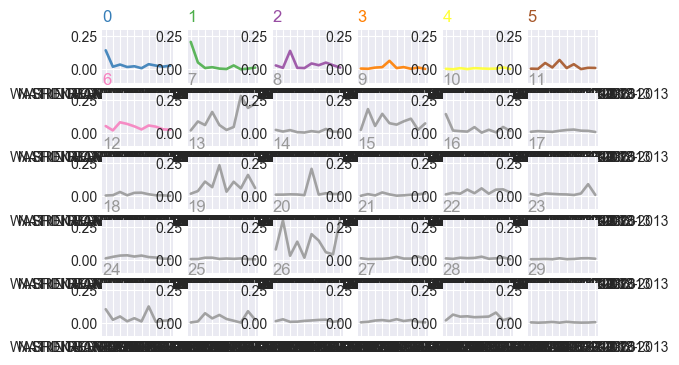

In [60]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

# multiple line plot
num=0
for column in df:
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(6,6, num)
 
    # Plot the lineplot
    x = df.index.values
    plt.plot(x, df[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
 
    # Same limits for everybody!
#     plt.xlim(0,30)
    plt.ylim(-.1,.3)

    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
    
    if num==30:
        break
 


In [79]:
model.show_topic(23)

[('marriag', 0.06678007),
 ('gay', 0.031128433),
 ('gay_marriag', 0.022525217),
 ('state', 0.017698865),
 ('support', 0.014030623),
 ('coupl', 0.013131489),
 ('marri', 0.0128582725),
 ('equal', 0.009442163),
 ('bill', 0.008465144),
 ('gay_right', 0.008431675)]

In [ ]:
# also do pairwise JSDs
# which topics are more? perhaps not neccessary. could use STM. 